In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import warnings 

In [178]:
#Read the data
data = pd.read_csv("/kaggle/input/50-startupscsv/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


##EDA

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [180]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [181]:
#check for missing values
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [182]:
#check for duplicated records
data[data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [183]:
# Rename the columns 

data1 = data.rename({'R&D Spend': 'RDS','Administration': 'ADM','Marketing Spend': 'MKS'}, axis=1)

## Correlation Analysis

In [184]:
data1.corr()

,RDS,ADM,MKS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

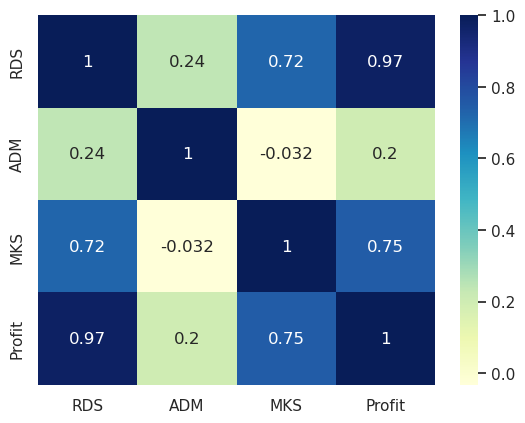

In [185]:
sns.heatmap(data1.corr(), cmap="YlGnBu", annot=True)

### **Scatterplot between variables along with histograms**

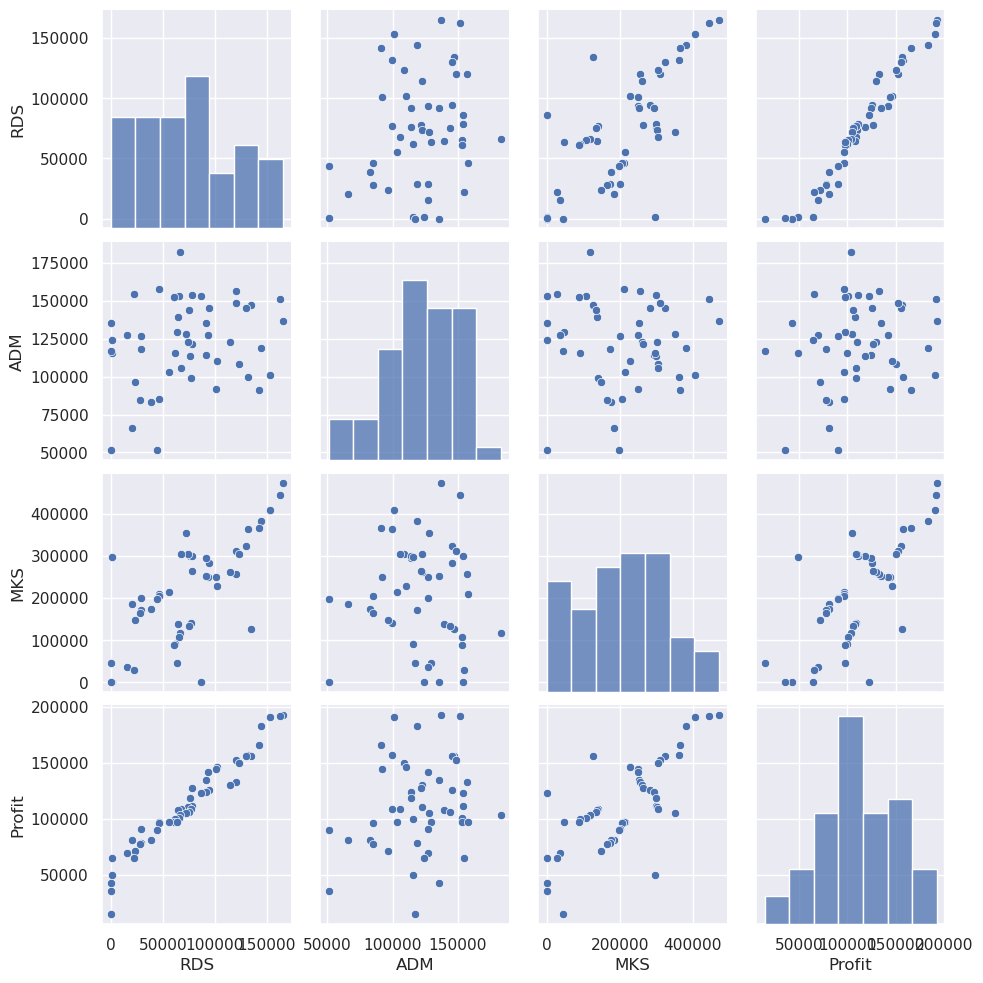

In [186]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

##Model Building

In [187]:
model = smf.ols('Profit~RDS+ADM+MKS',data=data1).fit()


##Model Testing

In [188]:
#Co-efficient of model
model.params

Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MKS              0.027228
dtype: float64

In [189]:
# Summary of model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 19 May 2023   Prob (F-statistic):           4.53e-30
Time:                        06:41:05   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKS            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The Accuracy of the model is 95.1 %

In [190]:
# Since the p value for Administration and Marketing Spend is > 0.05 build simple linear regression and multi linear regression models  to see insignificant variables

In [191]:
slr_adm = smf.ols('Profit~ADM',data=data1).fit()

In [192]:
slr_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 19 May 2023   Prob (F-statistic):              0.162
Time:                        06:41:05   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADM            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 After we build a simple linear regression model , we can see that administration has no signifcant p value 

In [193]:
# Build a simple linear model to check the column Marketing

slr_mar = smf.ols('Profit~MKS',data=data1).fit()

In [194]:
slr_mar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 19 May 2023   Prob (F-statistic):           4.38e-10
Time:                        06:41:05   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MKS            0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

SInce the p value is less than 0.05 we can say that it is a significant column

In [195]:
# Build the Multi Linear regression model of Adminstration and Marketing together to check for collinearity problem

slr_AM = smf.ols('Profit~ADM+MKS',data=data1).fit()

In [196]:
slr_AM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 19 May 2023   Prob (F-statistic):           2.50e-10
Time:                        06:41:05   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADM            0.3237      0.131      2.468      0.017       0.060       0.588
MKS            0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we build the model together both of the columns have significant p value

# Model Validation Techniques

* 1) Collinearity Check - VIF
* 2) Residual Analysis

Calculating Variance Inflation Factor (VIF) = 1/1-r^2

In [197]:
rsq_rds = smf.ols('RDS~ADM+MKS',data=data1).fit().rsquared  
vif_rds = 1/(1-rsq_rds) 
vif_rds


2.4689030699947017

In [198]:
rsq_adm = smf.ols('ADM~RDS+MKS',data=data1).fit().rsquared  
vif_adm = 1/(1-rsq_adm) 
vif_adm

1.1750910070550455

In [199]:
rsq_mks = smf.ols('MKS~RDS+ADM',data=data1).fit().rsquared  
vif_mks = 1/(1-rsq_mks) 
vif_mks

2.326773290530878

In [200]:
# Storing vif values in a data frame
d1 = {'Variables':['RDS','ADM','MKS'],'VIF':[vif_rds,vif_adm,vif_mks]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADM,1.175091
2,MKS,2.326773


Since No value of VIF is greater than 20 , we can say that there is no collinearity problem. So we shall consider all columns for building the model

##Residual Analysis

##Test for Normality of Residuals (Q-Q Plot)

<Figure size 1600x900 with 0 Axes>

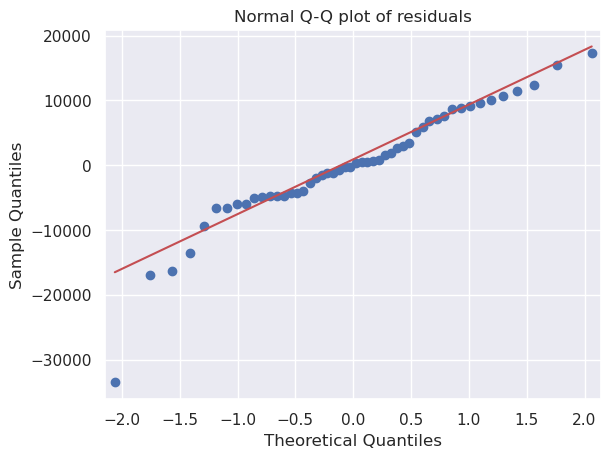

In [201]:
plt.figure(figsize=(16,9))
sns.set_style(style='darkgrid')
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [202]:
list(np.where(model.resid<-10000))

[array([14, 15, 48, 49])]

Residual Plot for **Homoscedasticity** or **Heteroscedasticity**  (plotting 
model's standardized fitted values vs standardized residual values)

In [203]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()  #User Defined Function Z = (x-mu)/sigma

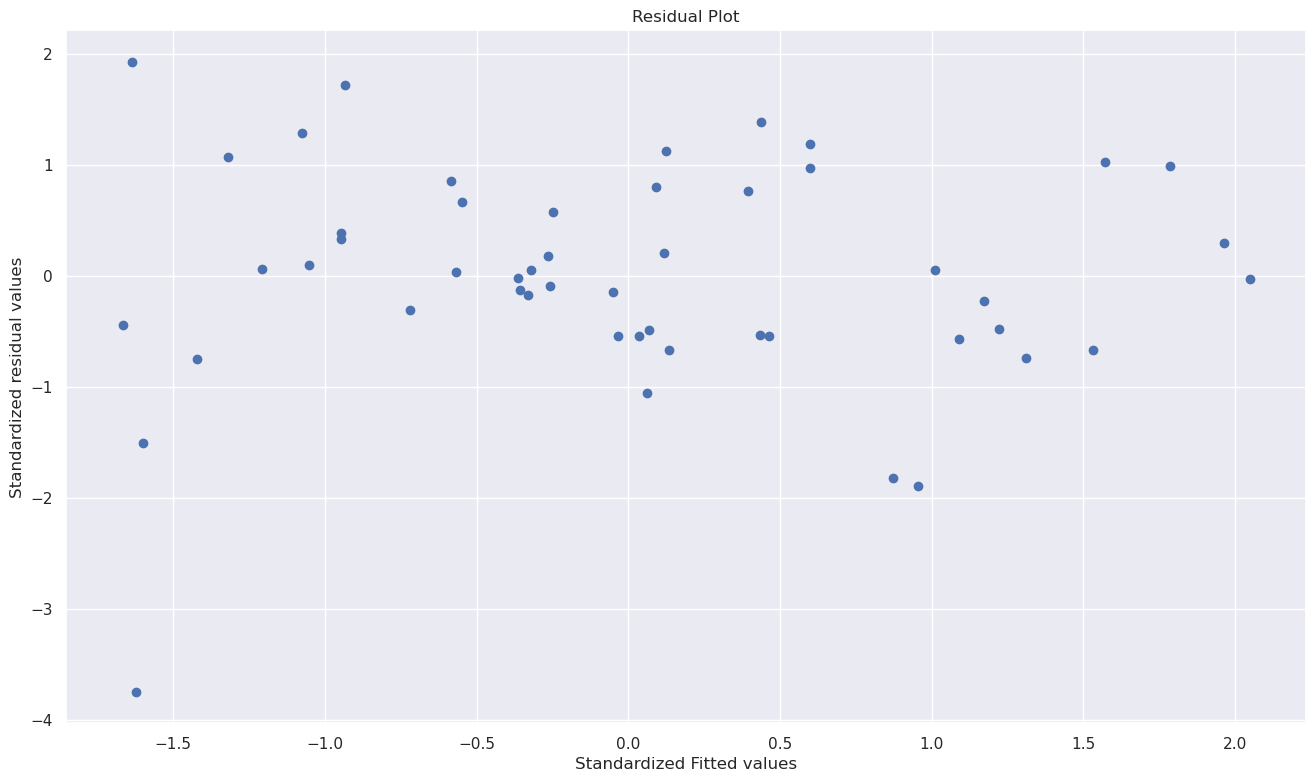

In [204]:
plt.figure(figsize=(16,9))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Residual Vs Regressors

eval_env: 1


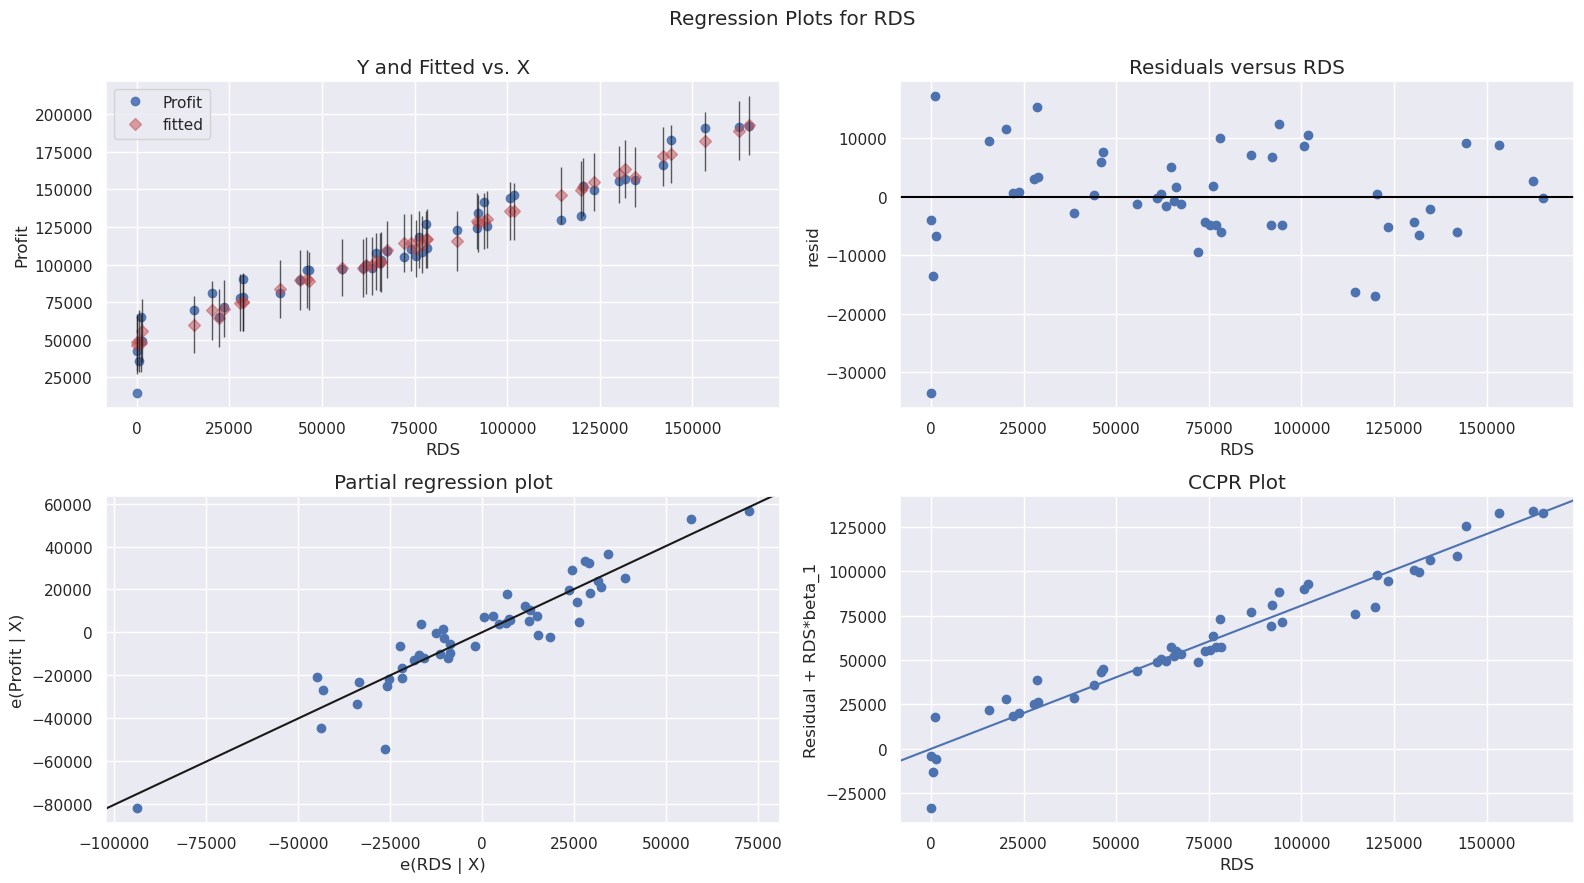

In [205]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

eval_env: 1


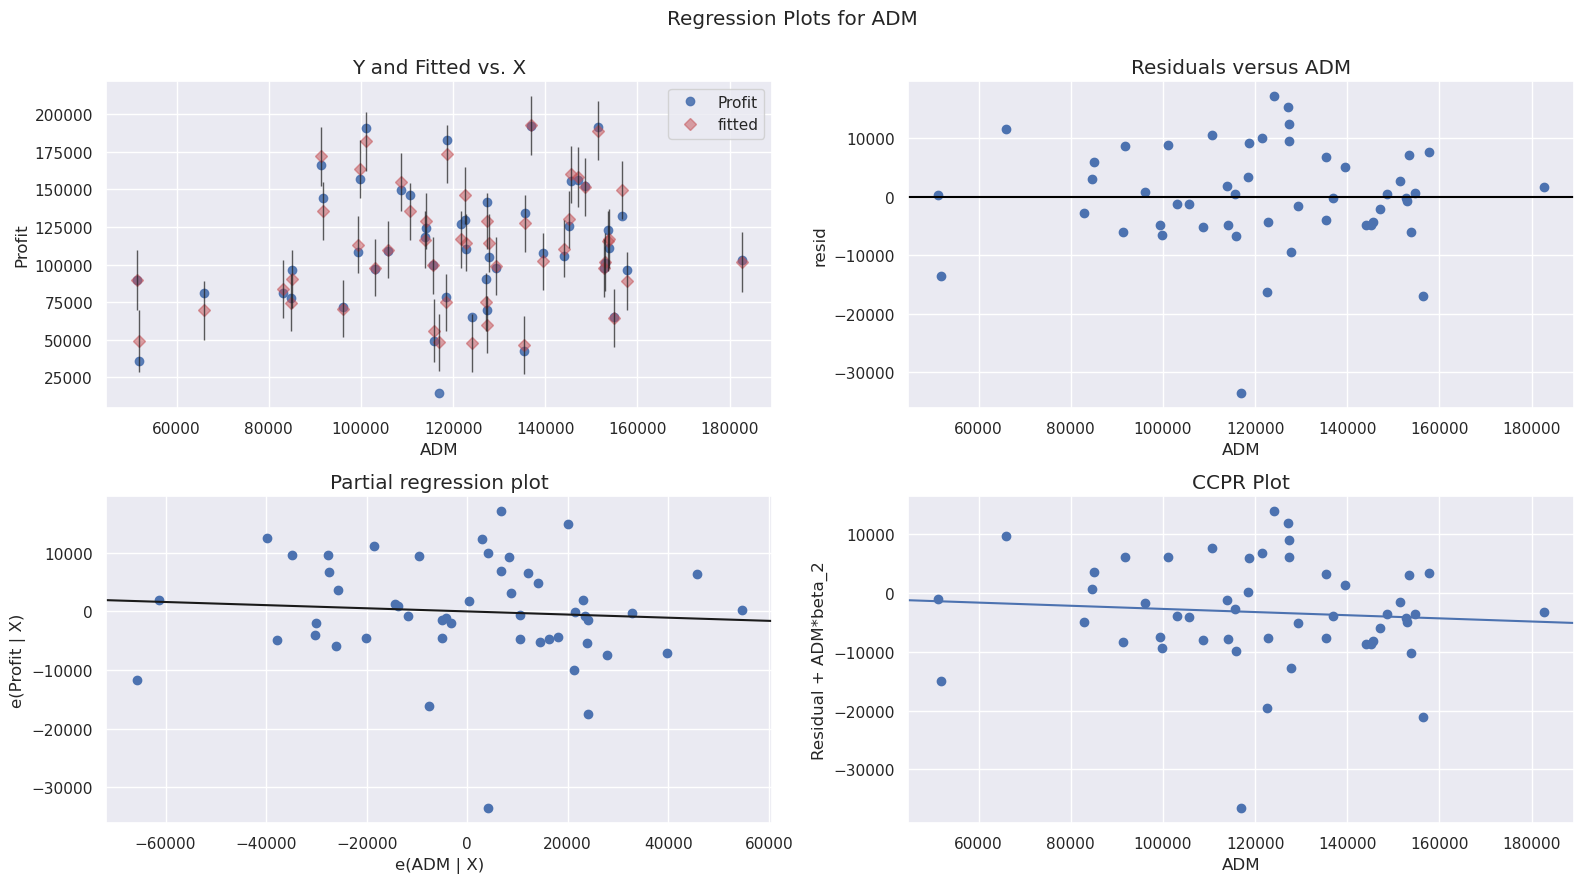

In [206]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model, "ADM", fig=fig)
plt.show()

eval_env: 1


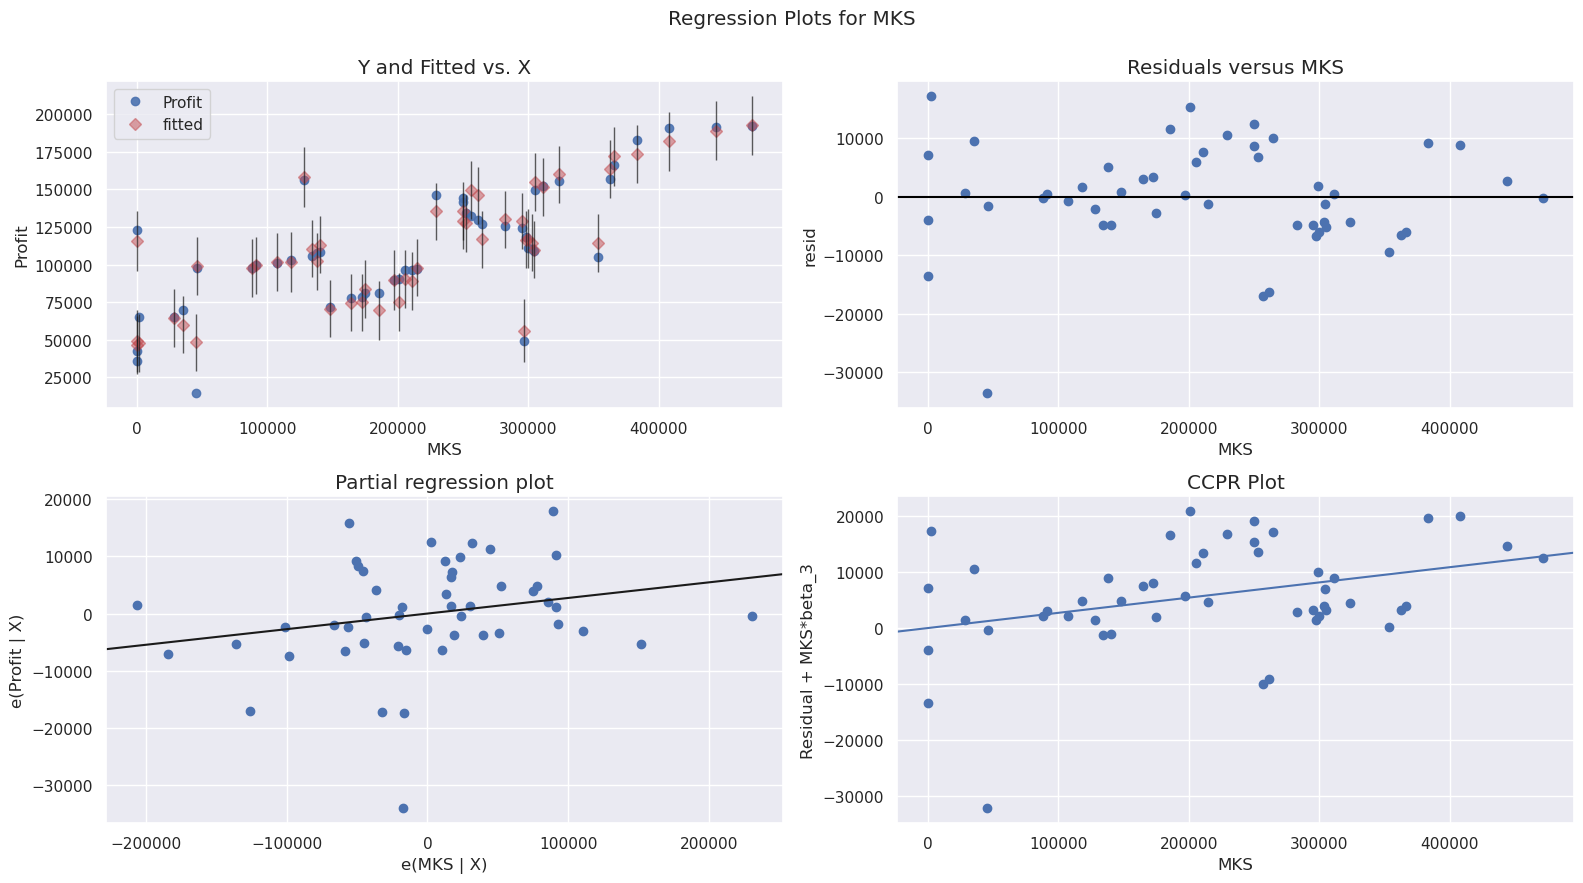

In [207]:
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model, "MKS", fig=fig)
plt.show()

#### **Detecting Influence & Cooks Distance**

In [208]:
  model_influence = model.get_influence()
  (c, _) = model_influence.cooks_distance

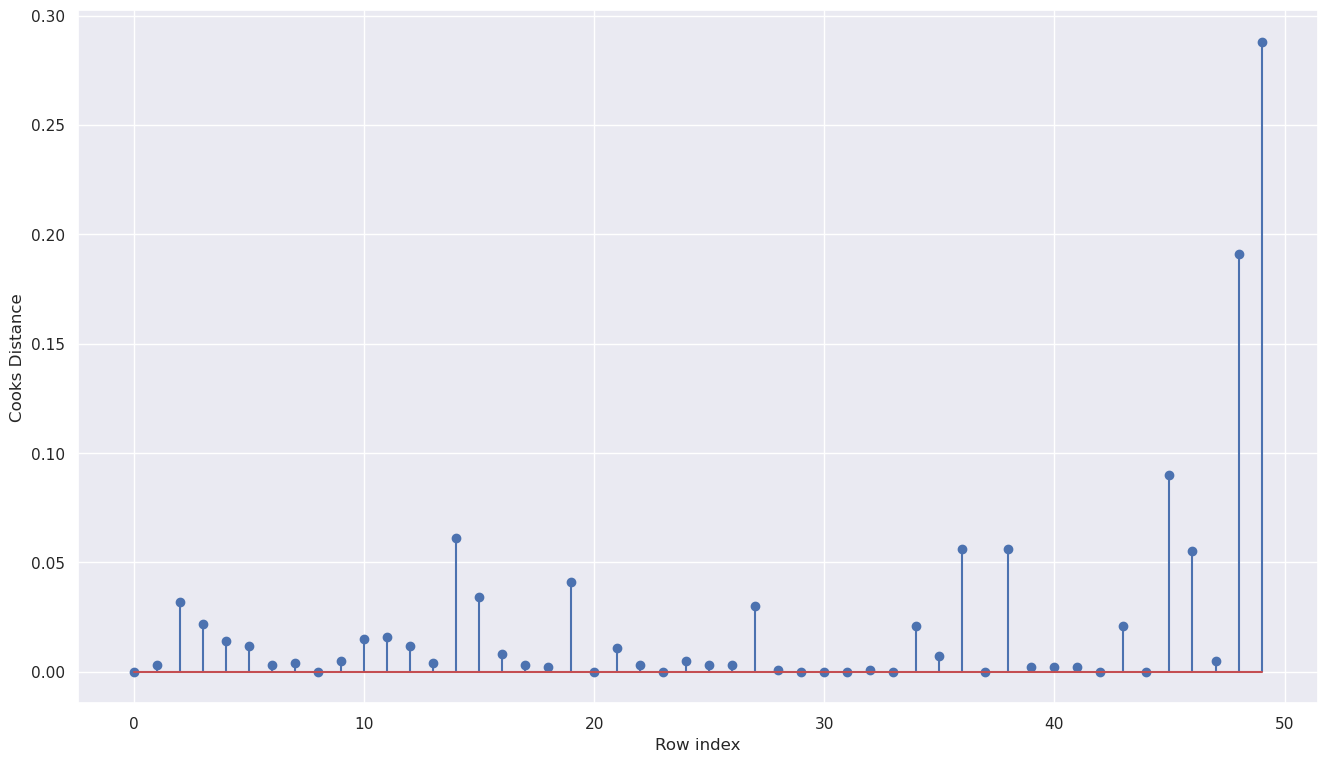

In [209]:
#Plot the influencers values using stem plot
sns.set_style(style='darkgrid')
fig = plt.subplots(figsize=(16, 9))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

#### **High Influence Plots**

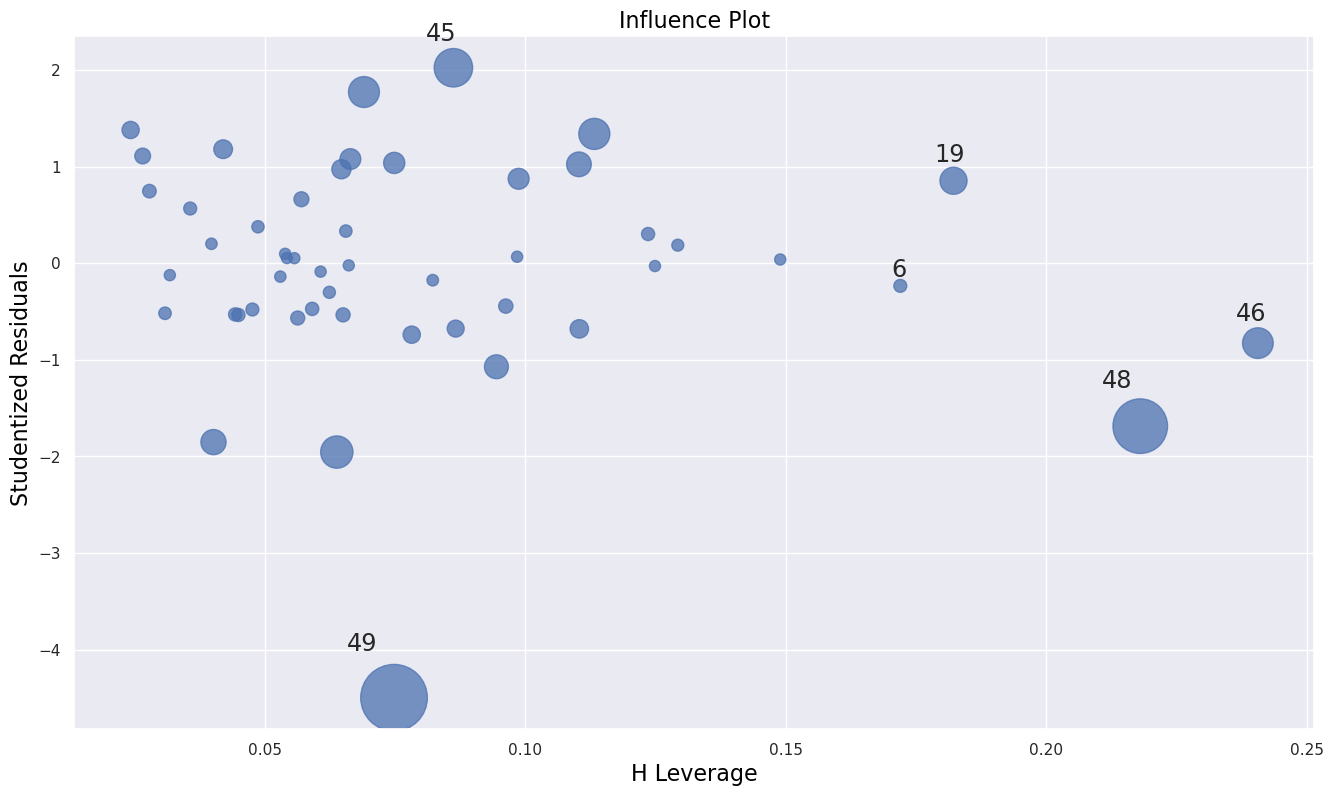

In [210]:
fig,ax=plt.subplots(figsize=(16,9))
fig=influence_plot(model,ax = ax)

In [211]:
k = data1.shape[1]     # k = no.of features/columns & n = no. of datapoints
n = data1.shape[0] 
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [212]:
data1[data1.index.isin([49])]

,RDS,ADM,MKS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4
